#### RowNumber、CustomerId is the primary key
#### Surname is the last name of the customer
#### CreditScore is Credit score of the customer. Higher credit score means better banking behaviors
#### Geography means 郵遞區號 
#### Gender、Age as seen
#### Tenure：不動產數量
#### Balance：帳戶內金額
#### Has credit car as seen.
#### Is Active member as seen
#### EstimatedSalary as seen
#### Exit：The target featrue.

Row:8000
Col:13

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv('train.csv')
train_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [2]:
train_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5001.026625,1.569089e+07,630.804875,42.988125,4.567375,100569.286116,1.534250,0.702750,0.516875,100103.554906,0.204000
std,2879.566761,7.187306e+04,59.076984,7.515870,1.272758,31431.771836,0.582554,0.457076,0.499746,24511.460933,0.402994
min,1.000000,1.556571e+07,446.000000,28.000000,2.000000,62397.410000,1.000000,0.000000,0.000000,57522.070000,0.000000
25%,2500.750000,1.562882e+07,590.000000,38.000000,4.000000,62397.410000,1.000000,0.000000,0.000000,79216.925000,0.000000
50%,5014.000000,1.569017e+07,631.000000,42.000000,5.000000,111118.600000,1.000000,1.000000,1.000000,100056.110000,0.000000
75%,7474.250000,1.575398e+07,672.000000,47.000000,6.000000,126500.100000,2.000000,1.000000,1.000000,121104.542500,0.000000
max,9999.000000,1.581569e+07,753.000000,81.000000,7.000000,188500.680000,4.000000,1.000000,1.000000,142481.990000,1.000000


In [3]:
data = train_data.copy()
exited = data[data.Exited==1]
not_exited = data[data.Exited==0]
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.009613,0.013601,0.016569,0.007163,0.005026,-0.006705,0.003179,0.003316,0.027600,0.004003
CustomerId,0.009613,1.000000,0.000929,-0.006874,0.002657,-0.003853,0.003545,0.003356,-0.006845,-0.000375,-0.001401
CreditScore,0.013601,0.000929,1.000000,0.002744,0.002374,0.001024,0.008050,-0.013454,0.026846,-0.004503,-0.024877
Age,0.016569,-0.006874,0.002744,1.000000,-0.005595,0.036458,-0.028103,-0.009543,0.096660,-0.004913,0.284937
Tenure,0.007163,0.002657,0.002374,-0.005595,1.000000,-0.013555,0.007594,0.024330,-0.019281,0.001388,-0.015832
Balance,0.005026,-0.003853,0.001024,0.036458,-0.013555,1.000000,-0.299640,-0.014920,-0.015470,0.021139,0.120387
NumOfProducts,-0.006705,0.003545,0.008050,-0.028103,0.007594,-0.299640,1.000000,0.000679,0.010682,0.008099,-0.048936
HasCrCard,0.003179,0.003356,-0.013454,-0.009543,0.024330,-0.014920,0.000679,1.000000,-0.007592,-0.020165,-0.006711
IsActiveMember,0.003316,-0.006845,0.026846,0.096660,-0.019281,-0.015470,0.010682,-0.007592,1.000000,-0.011354,-0.158626
EstimatedSalary,0.027600,-0.000375,-0.004503,-0.004913,0.001388,0.021139,0.008099,-0.020165,-0.011354,1.000000,0.007740


In [4]:
data = train_data.copy()
cols_to_drop = data.columns[[0,1,2]]
data = data.drop(columns=cols_to_drop)
categorical_feature = data.columns[[1]]
dummy = pd.get_dummies(data[categorical_feature])
data = data.merge(dummy , on = data.index)
data = data.drop(columns=data.columns[[0,2,3]])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,720,38,5,114051.97,2,0,1,107577.29,0,0,0,1
1,682,54,4,62397.41,1,1,0,113088.60,1,1,0,0
2,672,31,5,119903.67,1,1,1,132925.17,0,1,0,0
3,592,40,4,104257.86,1,1,0,110857.33,0,0,0,1
4,753,42,5,120387.73,1,0,1,126378.57,0,0,0,1


In [5]:
#data = data[data.Balance!=62397.41]
#data.groupby('Exited').boxplot(column='Balance')
# (data.Balance==62397.41).sum()
data = data.drop(columns='Balance')

In [6]:
x = data.drop(columns = 'Exited')
y = data['Exited']

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x,y)
importance = pd.Series(rf.feature_importances_ , index = x.columns)
sorted_cols = importance.sort_values(ascending=False).index

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
models = [KNeighborsClassifier , SVC , DecisionTreeClassifier , RandomForestClassifier , XGBClassifier , LGBMClassifier]

In [9]:
from sklearn.model_selection import cross_validate , GridSearchCV
all_scores = {}
for model in models:
    clf = model()
    scores = cross_validate(clf, x[sorted_cols], y, cv=5 , scoring={'acc':'accuracy' , 'pre':'precision' , 'f1':'f1'})
    df = pd.DataFrame(scores)
    score = df[['test_acc' , 'test_pre' , 'test_f1']].mean().mean()
    all_scores[model] = score
all_scores

C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

[20:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yang8\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yang8\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yang8\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yang8\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{sklearn.neighbors._classification.KNeighborsClassifier: 0.3600926090975263,
 sklearn.svm._classes.SVC: 0.26533333333333337,
 sklearn.tree._classes.DecisionTreeClassifier: 0.5681487711973273,
 sklearn.ensemble._forest.RandomForestClassifier: 0.6942311239513609,
 xgboost.sklearn.XGBClassifier: 0.6950064252530579,
 lightgbm.sklearn.LGBMClassifier: 0.7151334262655252}

C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yang8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

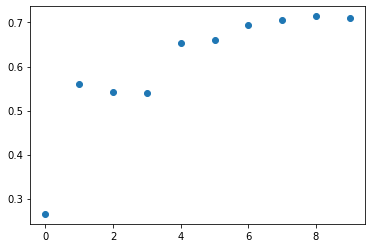

In [10]:
all_scores = {}
for i in range(len(sorted_cols)):
    clf = LGBMClassifier()
    scores = cross_validate(clf, x[sorted_cols[:i]], y, cv=5 , scoring={'acc':'accuracy' , 'pre':'precision' , 'f1':'f1'})
    df = pd.DataFrame(scores)
    score = df[['test_acc' , 'test_pre' , 'test_f1']].mean().mean()
    all_scores[i] = score
all_scores = pd.Series(all_scores)
plt.scatter(all_scores.index , all_scores)

In [11]:
from sklearn.model_selection import cross_validate , GridSearchCV
all_scores = {}
for level in np.arange(0.1,5,0.1):
    clf = LGBMClassifier(class_weight = {1:1,0:2} , metric = 'binary_logloss' , colsample_bytree = 0.8 , reg_alpha = level , max_depth = 2 , min_child_samples = 6 , objective = 'binary')
    scores = cross_validate(clf, x[sorted_cols[:10]], y, cv=5 , scoring={'acc':'accuracy' , 'pre':'precision' , 'f1':'f1'})
    df = pd.DataFrame(scores)
    score = df[['test_acc' , 'test_pre' , 'test_f1']].mean().mean()
    all_scores[level] = score
all_scores

{0.1: 0.7298301672785078,
 0.2: 0.729774159106135,
 0.30000000000000004: 0.729185350373934,
 0.4: 0.7298338568443539,
 0.5: 0.7291293739267172,
 0.6: 0.7310868137947161,
 0.7000000000000001: 0.7302350417887128,
 0.8: 0.7270624377071452,
 0.9: 0.7288763808770393,
 1.0: 0.7275026966687914,
 1.1: 0.7296100216422213,
 1.2000000000000002: 0.7277245727868805,
 1.3000000000000003: 0.7286186264222243,
 1.4000000000000001: 0.728976480905961,
 1.5000000000000002: 0.724104744927882,
 1.6: 0.7255863558097397,
 1.7000000000000002: 0.7276590052578503,
 1.8000000000000003: 0.7252536790966655,
 1.9000000000000001: 0.72598328310944,
 2.0: 0.7252682678708284,
 2.1: 0.7275855170343725,
 2.2: 0.725403863793676,
 2.3000000000000003: 0.72423454121139,
 2.4000000000000004: 0.723759017570929,
 2.5000000000000004: 0.7236581851625165,
 2.6: 0.7242004540402073,
 2.7: 0.7243669370686142,
 2.8000000000000003: 0.7248895918992061,
 2.9000000000000004: 0.7241250983464659,
 3.0000000000000004: 0.7225784373408906,
 3.1

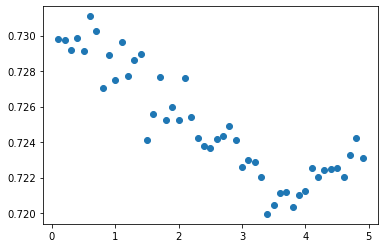

In [12]:
all_scores = pd.Series(all_scores)
plt.scatter(all_scores.index , all_scores)

In [13]:
x_train = x[sorted_cols[:10]]
y_train = y

In [14]:
# weight = []
# for i in y_train:
#     if i==1:
#         weight.append(3)
#     else:
#         weight.append(1)

In [15]:
def accuracy(pre , ans):
  return((pre==ans).mean())
def precision(pre , ans):
  tp = 0
  fp = 0
  ans = list(ans)
  for i , p in enumerate(pre):
    if p==1:
      if ans[i]==1:
        tp+=1
      else:
        fp+=1
  return(tp/(tp+fp)) 
def recall(pre ,ans):
  tp = 0
  fn = 0
  ans = list(ans)
  for i , a in enumerate(ans):
    if a==1:
      if pre[i]==1:
        tp+=1
      else:
        fn+=1
  return(tp/(tp+fn))
def f1_score(pre , rec):
  return(2*pre*rec/(pre+rec))
def final(accuracy , precision , f1_score):
  return((accuracy+precision+f1_score)/3)

In [16]:
p = 8
p = len(sorted_cols)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_train , y_train)
#clf = RandomForestClassifier()
#clf = XGBClassifier()
clf = LGBMClassifier(metric = 'binary_logloss' , colsample_bytree = 0.8 , reg_alpha = 0.01 , max_depth = 2 , min_child_samples = 6 , objective = 'binary')
clf.fit(x_train , y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=2, metric='binary_logloss',
               min_child_samples=6, objective='binary', reg_alpha=0.01)

In [17]:
pred = clf.predict(x_test)
acc = accuracy(pred , y_test)
prec = precision(pred , y_test)
rec = recall(pred , y_test)
f1 = f1_score(prec , rec)
fin = final(acc , prec , f1)
print('------------------------')
print('acc:',acc , 'prec:',prec , 'rec:',rec , 'f1:',f1 , 'final:',fin)

------------------------
acc: 0.8605 prec: 0.7654867256637168 rec: 0.43358395989974935 f1: 0.5536000000000001 final: 0.7265289085545724


In [18]:
    data_test = pd.read_csv('test.csv')
    data_test.head()
    test = data_test.copy()
    test = test.drop(columns = cols_to_drop)
    dummy = pd.get_dummies(test[categorical_feature])
    test = test.merge(dummy , on = test.index)
    test = test.drop(columns=test.columns[[0,2]])
    test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,726,Female,39,3,62397.41,1,0,0,106139.31,1,0,0
1,661,Male,42,3,130339.64,1,1,0,125776.38,1,0,0
2,545,Male,34,6,62397.41,2,1,1,78372.28,1,0,0
3,731,Female,42,3,86717.08,1,1,0,136026.27,0,0,1
4,533,Female,50,6,62397.41,1,1,1,135205.58,1,0,0


In [19]:
x_test = test[sorted_cols[:10]]
x_test.head()

,Age,EstimatedSalary,CreditScore,NumOfProducts,Tenure,IsActiveMember,HasCrCard,Geography_Germany,Geography_France,Geography_Spain
0,39,106139.31,726,1,3,0,0,0,1,0
1,42,125776.38,661,1,3,0,1,0,1,0
2,34,78372.28,545,2,6,1,1,0,1,0
3,42,136026.27,731,1,3,0,1,0,0,1
4,50,135205.58,533,1,6,1,1,0,1,0


In [20]:
prediction = clf.predict(x_test)

In [21]:
ans = pd.DataFrame({'RowNumber':data_test.RowNumber , 'Exited':prediction})
ans.to_csv('upload_.csv')
